# MainQuest02_가랏 몬스터볼! 전설의 포켓몬 찾아 삼만리


### 1-3. 포켓몬, 그 데이터는 어디서 구할까?  
[Kaggle] Pokemon with stats: https://www.kaggle.com/datasets/abcsds/pokemon

### 1-4. 포켓몬 데이터 불러오기

- 라이브러러리 가져오기

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


- 데이터셋을 pandas로 불러오기

In [ ]:
import os
original_data = pd.read_csv('Pokemon.csv')
print('슝=3')

슝=3


- pokemon 변수에 데이터를 저장  
(원본데이터와 구분)

In [ ]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


- Legendary == True 값을 가지는 [레전드 포켓몬] 데이터셋은 [legendary]변수에,  
Legendary == False 값을 가지는 [일반 포켓몬] 데이터셋은 [ordinary] 변수에 저장

In [ ]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon['Legendary'] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 1-5. 데이터의 이해 (1) 결측치와 전체 칼럼

- 결측치 확인하기


In [ ]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- 전체 컬럼 이해하기

In [ ]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

| Column Name | Data Type | Meaning (Korean)   |
|------------|-----------|-------------------|
| #          | int64     | 포켓몬 번호         |
| Name       | object    | 포켓몬 이름         |
| Type 1     | object    | 첫 번째 속성        |
| Type 2     | object    | 두 번째 속성        |
| Total      | int64     | 능력치 총합         |
| HP         | int64     | 체력 (HP)          |
| Attack     | int64     | 공격력             |
| Defense    | int64     | 방어력             |
| Sp. Atk    | int64     | 특수공격력         |
| Sp. Def    | int64     | 특수방어력         |
| Speed      | int64     | 속도               |
| Generation | int64     | 등장 세대          |
| Legendary  | bool      | 전설 여부          |

### 1-6. 데이터의 이해 (2) ID와 이름

- ID number : 집합에서 800이나 아니라 721이 나왔으므로 중복번호 존재


In [19]:
len(set(pokemon["#"]))

721

In [21]:
# 중복 케릭 예시 확인
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


- Name : 이름은 800개로 중복 없음 확인. 모두 Unique한 이름


In [22]:
len(set(pokemon["Name"]))

800

### 1-7. 데이터의 이해 (3) 포켓몬의 속성


Type 1 & Type 2 : 포켓몬의 속성


In [25]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


6번 포켓몬인 Charizard는 Fire와 Flying 속성 두 가지를, 8번 포켓몬인 Wartortle은 Water 속성 한 가지만 보유

In [27]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

Type 1에는 총 18가지, Type 2에는 총 19가지의 속성 존재.  
- Type 2의 속성이 더 많은 이유를 차집합으로 확인

In [28]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

- NaN 데이터 외의 나머지 18가지 속성은 Type 1, Type 2 모두 같은 세트의 데이터가 들어가 있음

- 포켓몬들의 모든 Type을 types 변수에 저장

In [30]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Normal', 'Fighting', 'Rock', 'Bug', 'Ice', 'Dark', 'Flying', 'Ghost', 'Fire', 'Electric', 'Ground', 'Psychic', 'Dragon', 'Fairy', 'Water', 'Poison', 'Steel', 'Grass']


- Type을 하나만 가지고 있는 포켓몬은 몇 마리?  
= Type 2가 NaN인 포켓몬의 수 = 386

In [32]:
print(pokemon["Type 2"].isna().sum())

386


##### Type 1 데이터 분포 plot

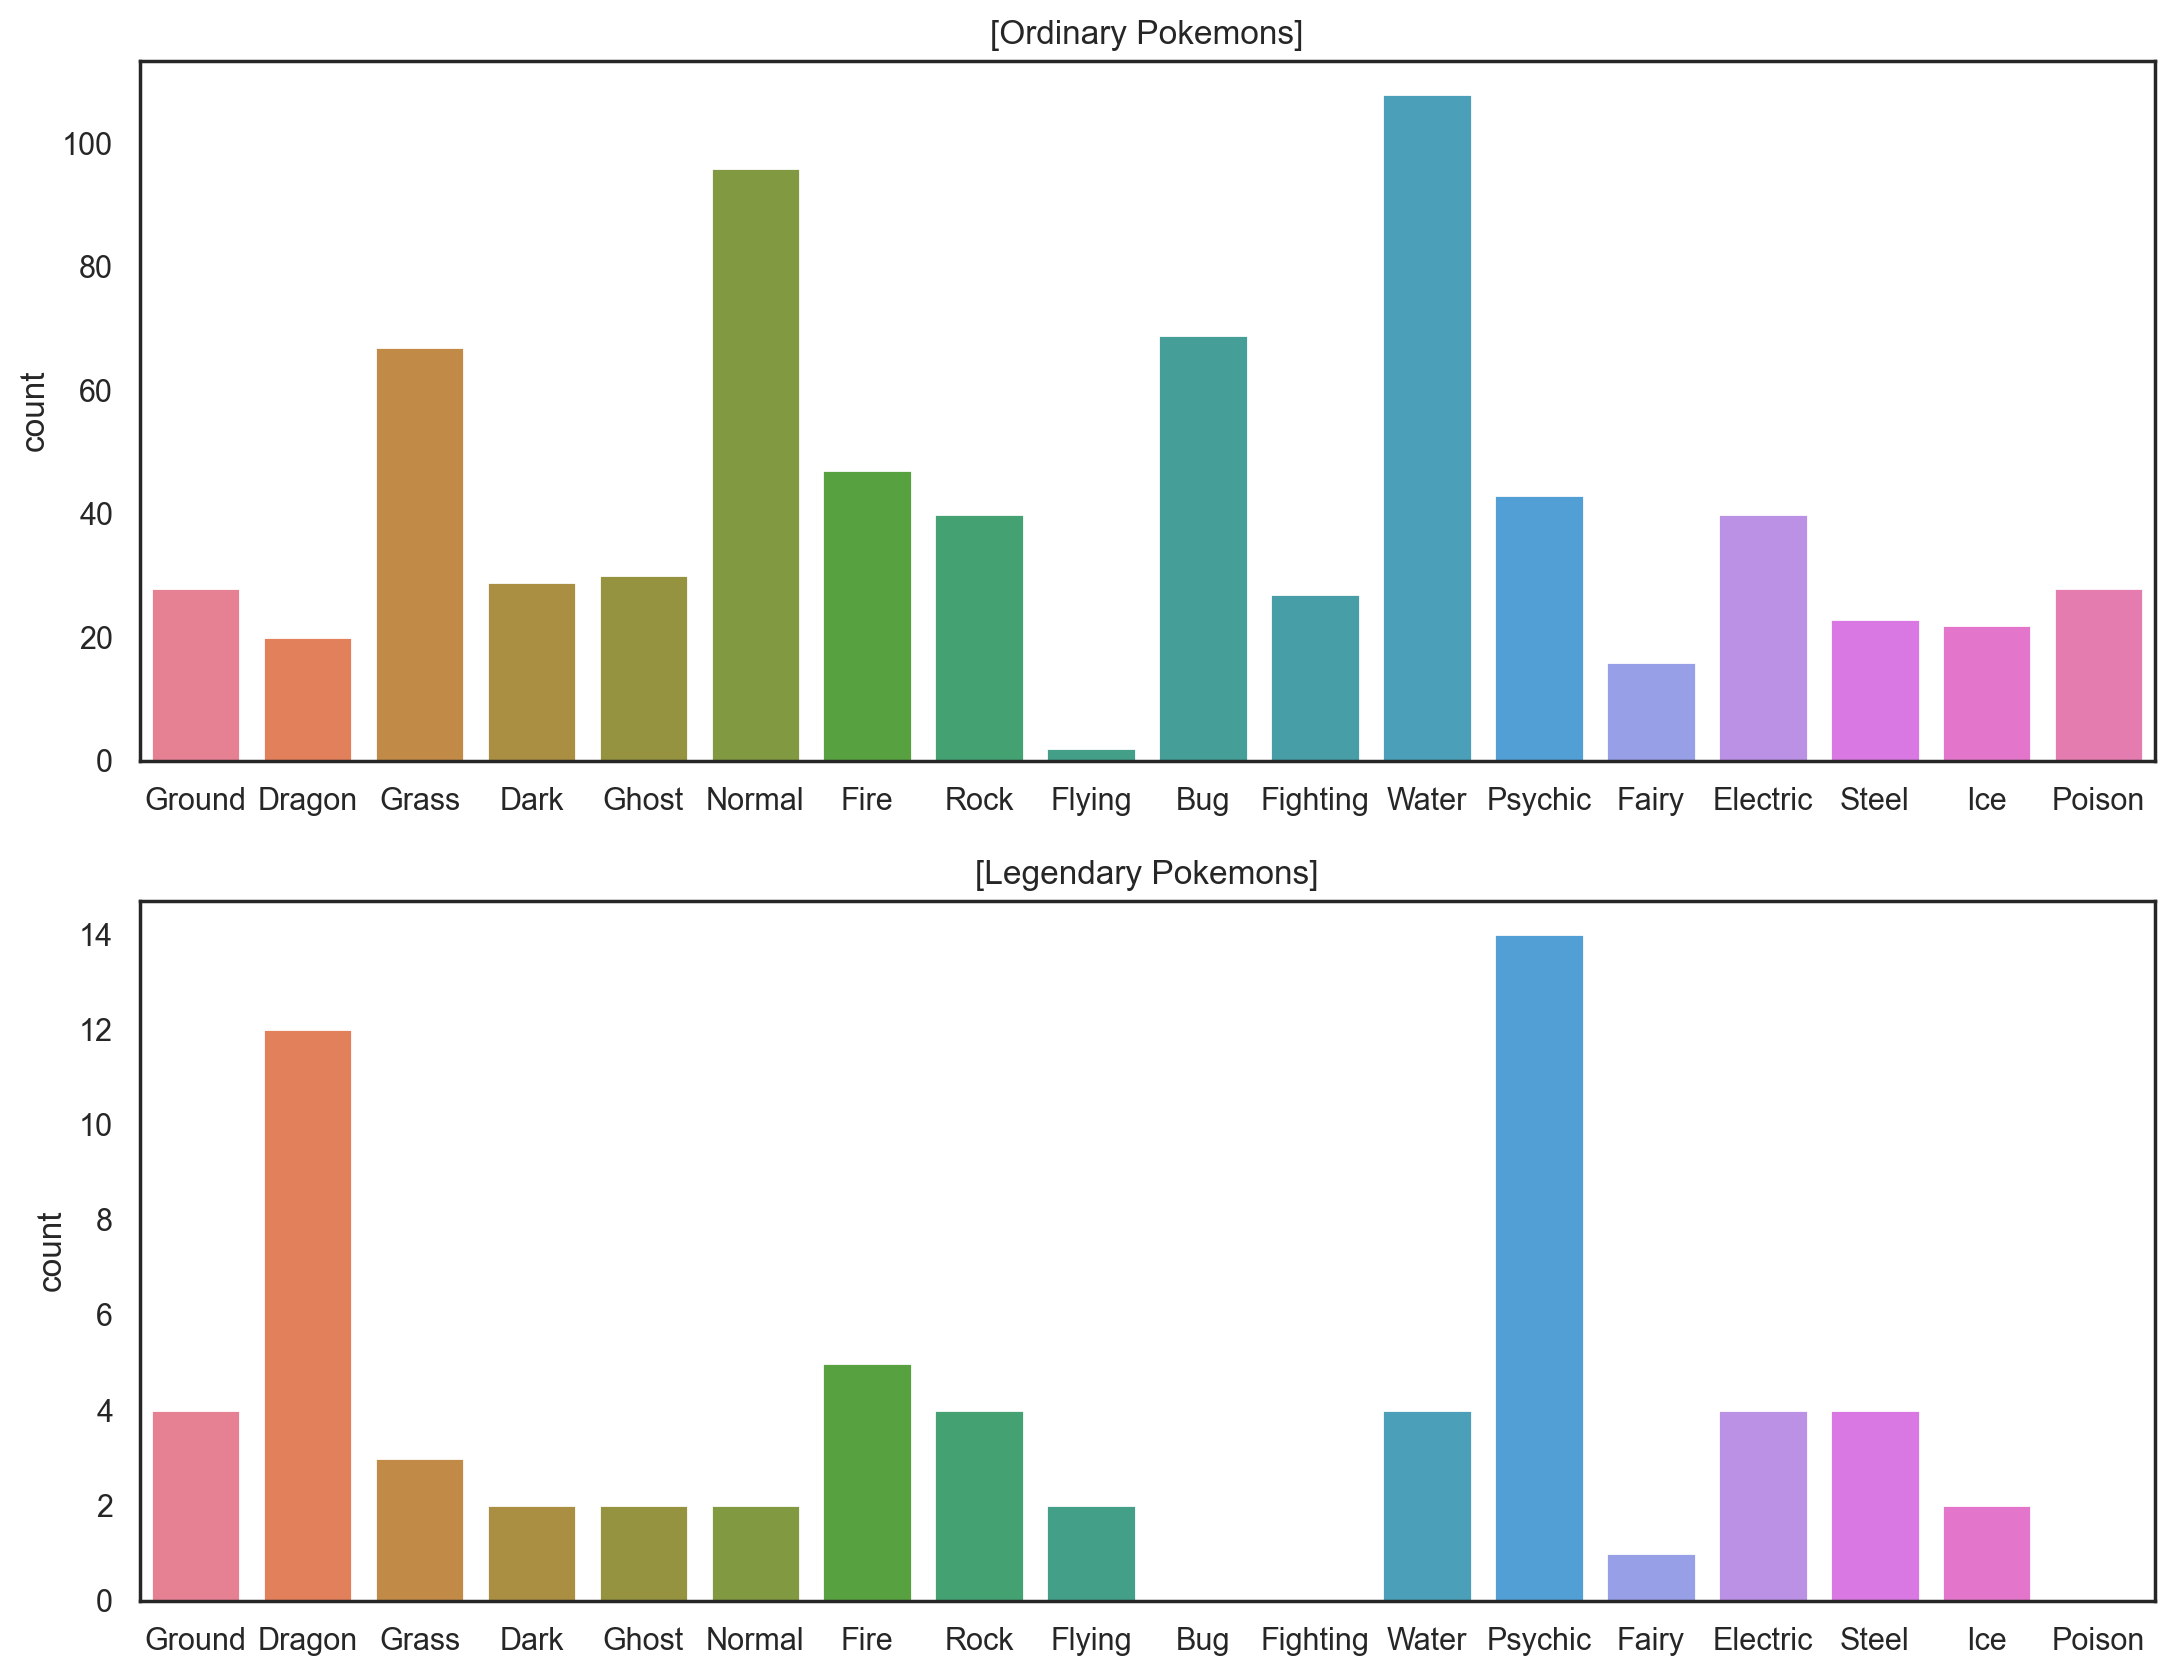

In [76]:
plt.figure(figsize=(13, 10))  

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", hue="Type 1", order=types, hue_order=types, palette="husl", dodge=False).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplots_adjust(hspace=0.2)  

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", hue="Type 1", order=types, hue_order=types, palette="husl", dodge=False).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

- 각 속성에 Legendary 포켓몬들이 몇 퍼센트씩 있는지 확인

In [59]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)


,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Rock,0.090909
Electric,0.090909
Ice,0.083333


##### Type 2 데이터 분포 plot


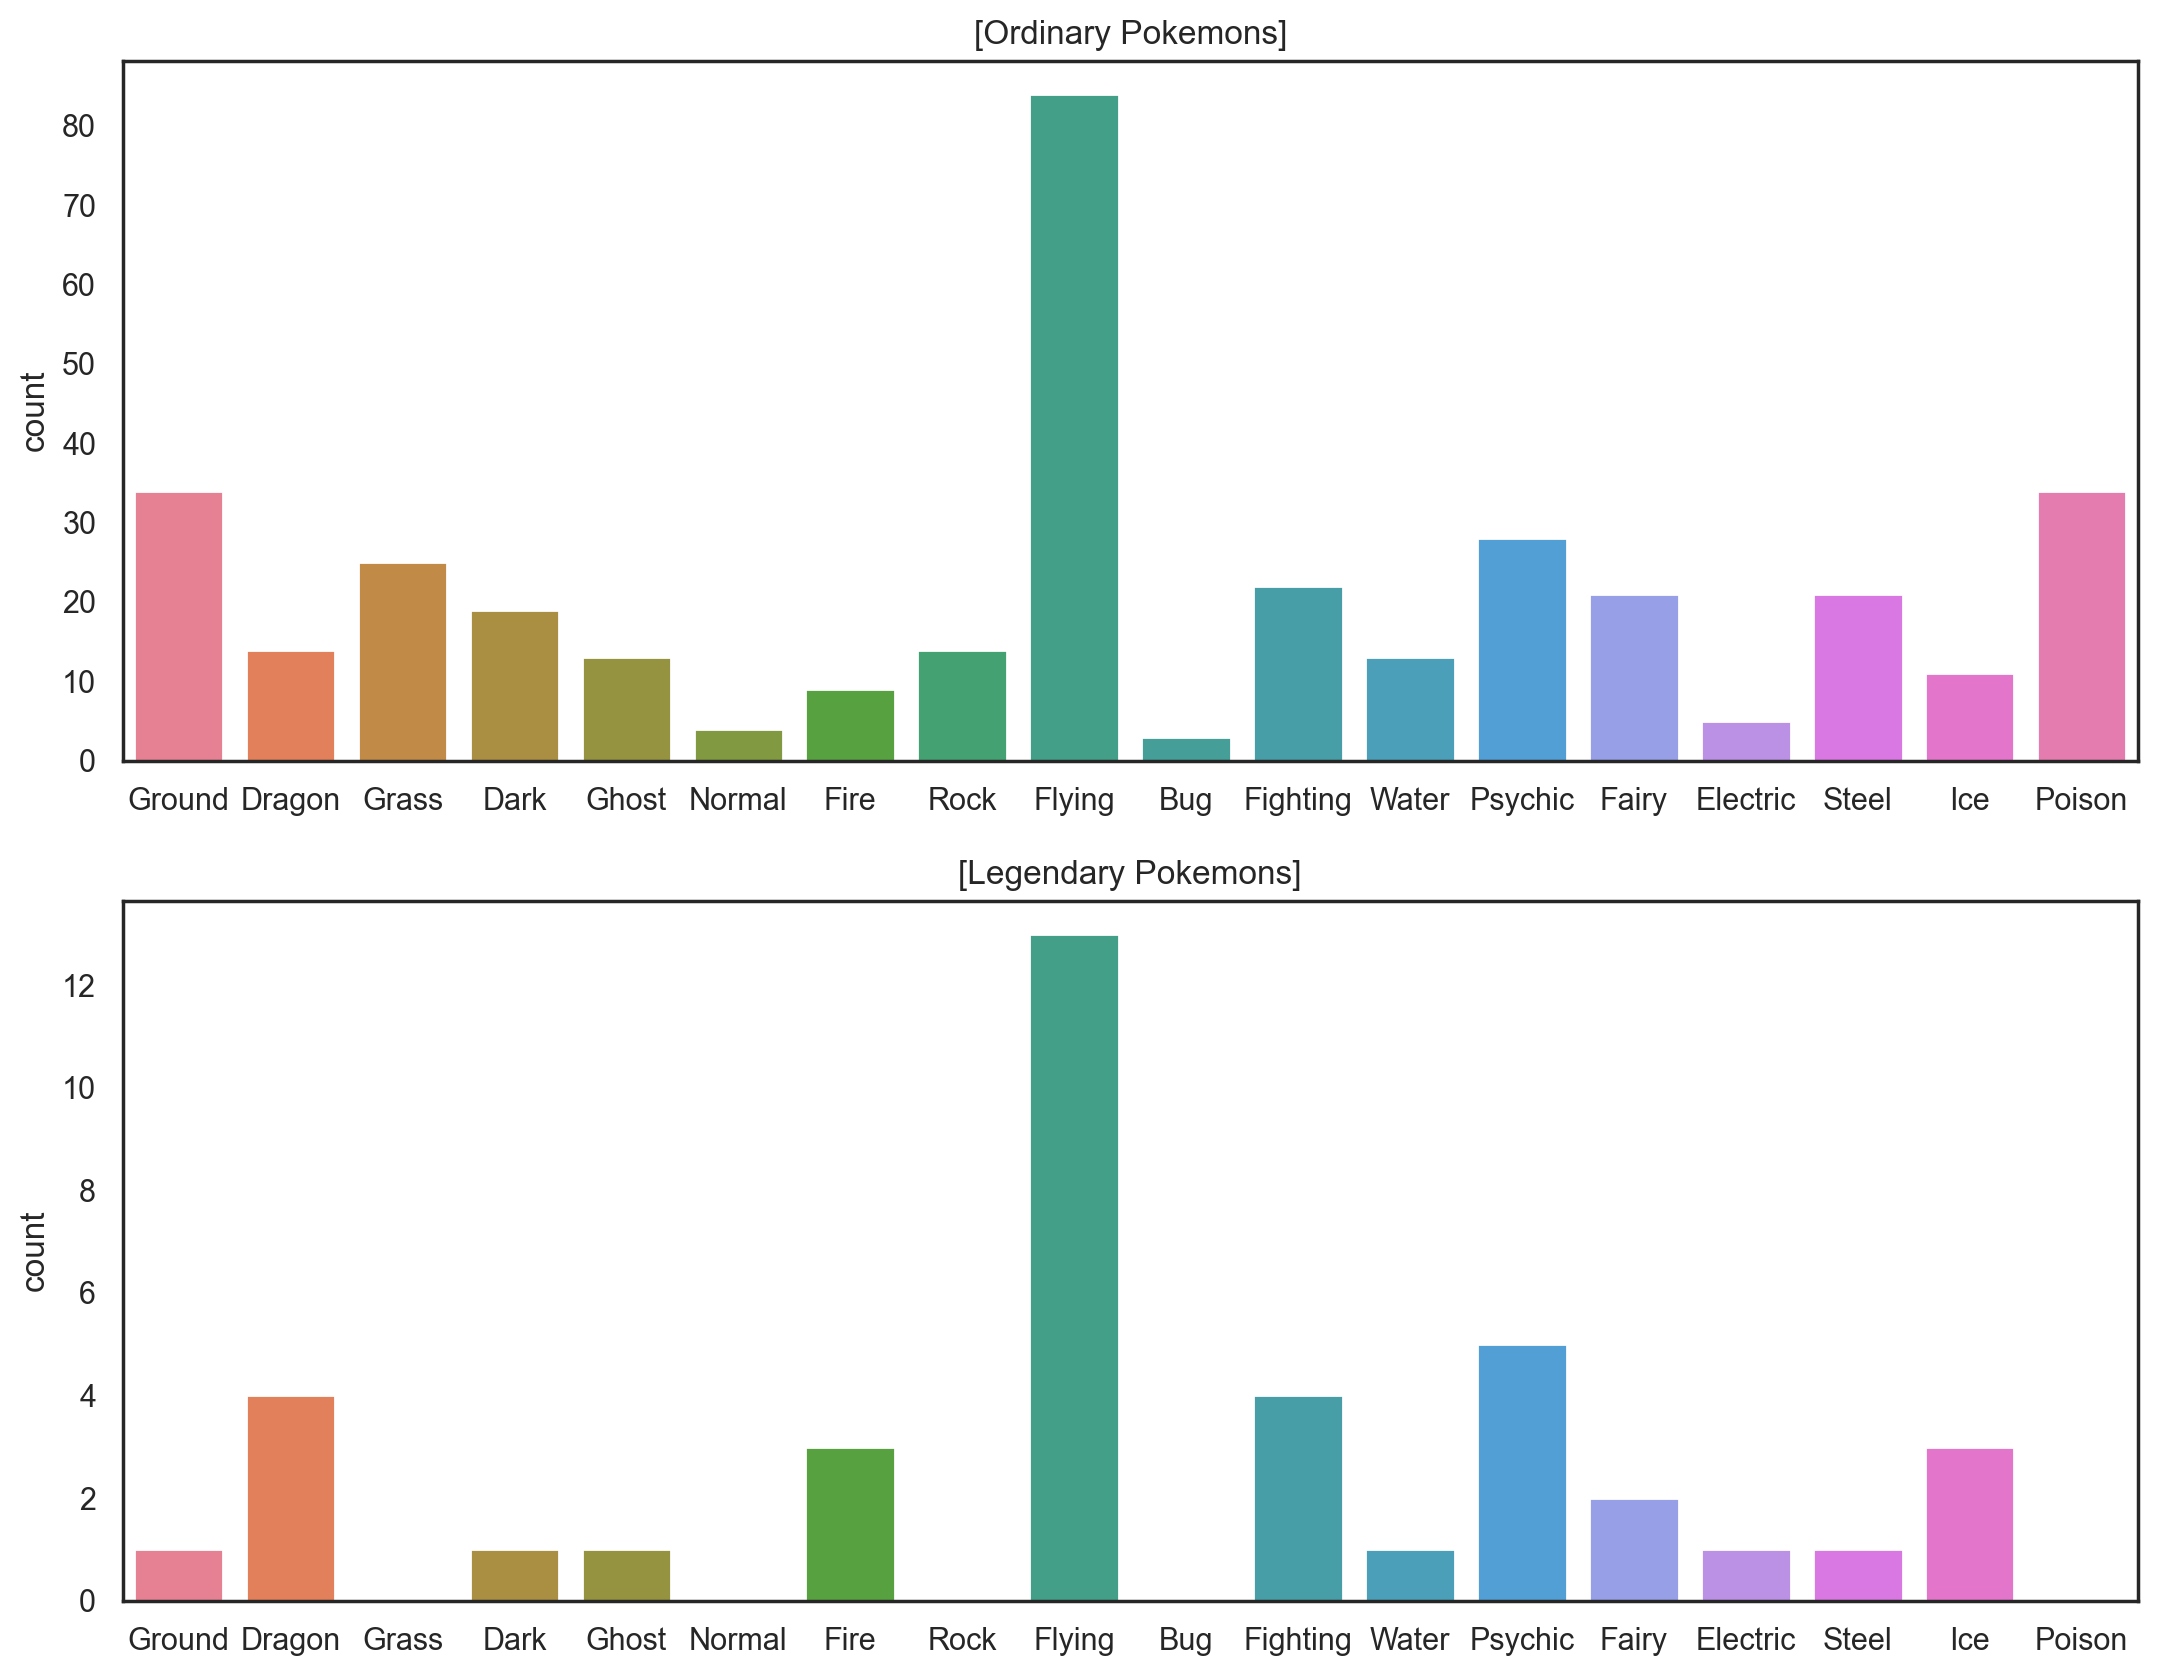

In [75]:
plt.figure(figsize=(13, 10))  

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", hue="Type 2", order=types, hue_order=types, palette="husl", dodge=False, legend=False).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplots_adjust(hspace=0.2)  

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", hue="Type 2", order=types, hue_order=types, palette="husl", dodge=False, legend=False).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [77]:
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


### 1-8. 데이터의 이해 (4) 모든 스탯의 총합

##### Total : 모든 스탯의 총합

In [81]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", pokemon.loc[0, stats].astype(int).tolist())
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


pokemon['Total'].values와 pokemon[stats].values들의 총합이 같은 포켓몬의 개수는 800으로  
모든 포켓몬이 total 가 정상

In [82]:
stat_count = (pokemon['Total'].values == pokemon[stats].values.sum(axis=1)).sum()
print(stat_count)

800


##### Total값에 따른 분포 plot


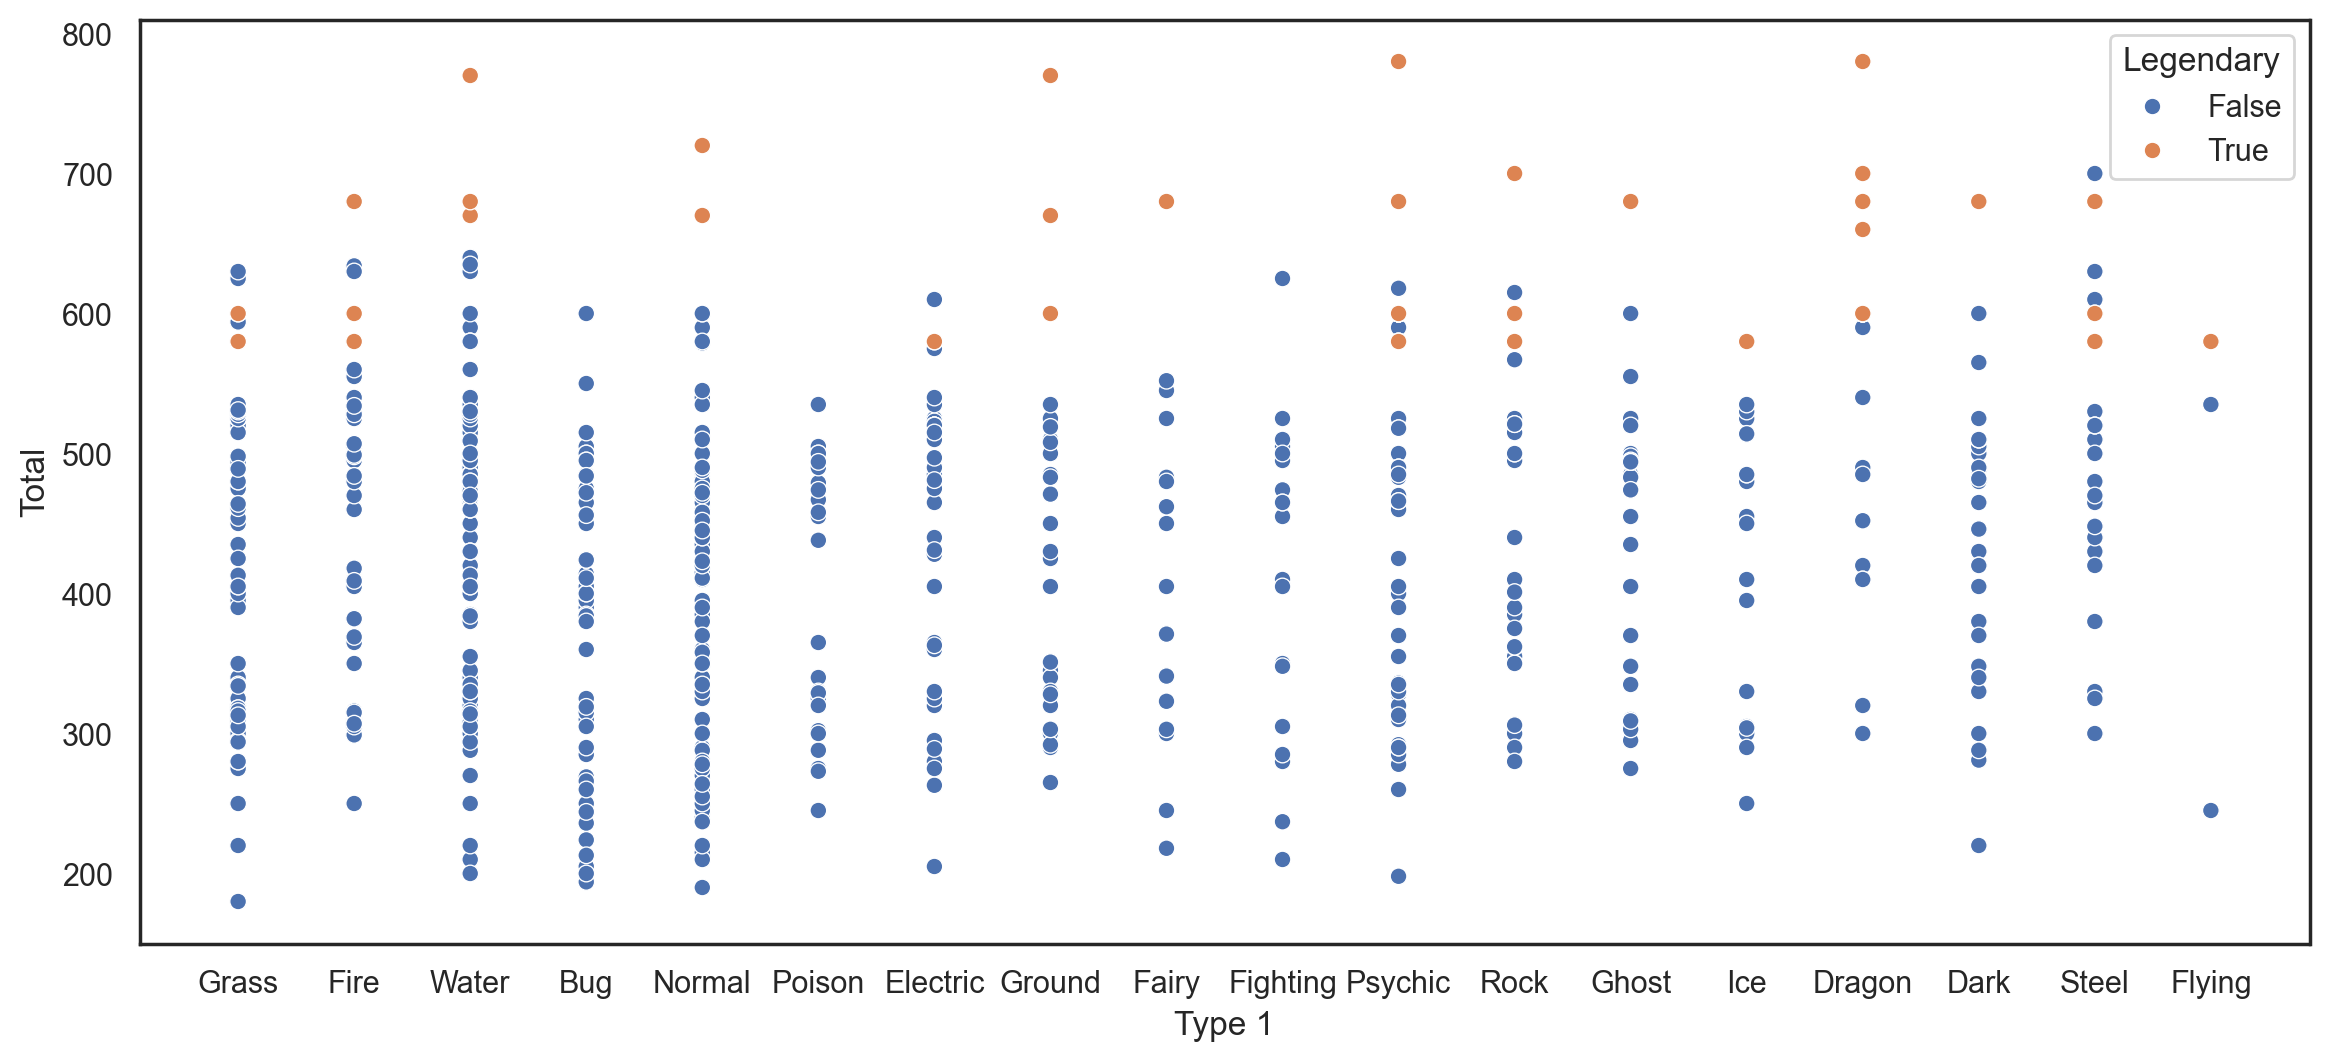

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)  

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

노란점(전설)의 스탯 총합이 대체로 상위에 위치

### 1-9. 데이터의 이해 (5) 세부 스탯


# References  
- [파이썬 차집합 함수(set difference)](https://www.w3schools.com/python/ref_set_difference.asp)  
- [판다스 isna() 함수](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)